# Demo Program: K-Means Clustering pada Dataset UNSW-NB15

Notebook ini digunakan untuk mendemonstrasikan proses clustering data trafik jaringan
menggunakan algoritma K-Means dengan penentuan jumlah cluster otomatis (Auto-K).

Fokus demo:
- Memahami dataset
- Menjelaskan preprocessing
- Menunjukkan pemilihan K
- Menampilkan hasil clustering & interpretasi


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

import sys
print("Python version:", sys.version)

Python version: 3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]


In [2]:
df = pd.read_csv("UNSW_NB15_training-set.csv")

print("Jumlah data:", df.shape)
df.head()
print(df.info())

Jumlah data: (175341, 45)
<class 'pandas.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  str    
 3   service            175341 non-null  str    
 4   state              175341 non-null  str    
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  

In [4]:
df.isnull().sum().sort_values(ascending=False).head(10)

id         0
dur        0
proto      0
service    0
state      0
spkts      0
dpkts      0
sbytes     0
dbytes     0
rate       0
dtype: int64

In [5]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,...,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,...,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,...,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,...,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,...,2,1,40,0,0,0,2,39,0,0


In [6]:
# Imputasi median
X = numeric_features.fillna(numeric_features.median())

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape setelah preprocessing:", X_scaled.shape)

Shape setelah preprocessing: (175341, 41)


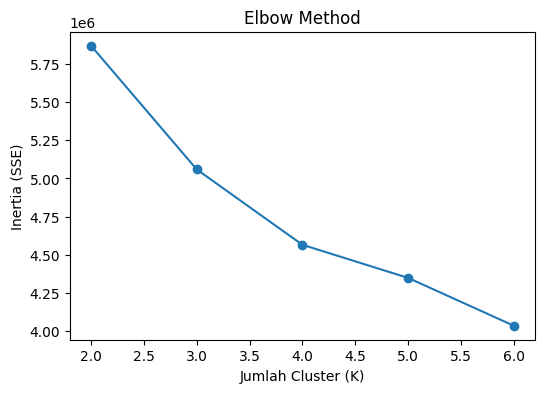

In [7]:
inertia = []
K_range = range(2, 7)

for k in K_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.show()


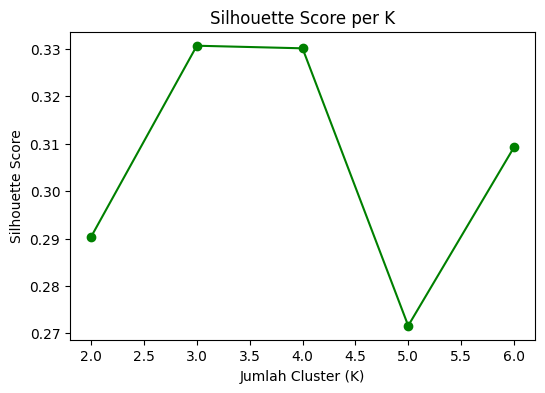

In [8]:
from sklearn.utils import resample

X_sample = resample(X_scaled, n_samples=2000, random_state=42)

silhouette_scores = []

for k in K_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per K")
plt.show()


In [9]:
k_optimal = 2

final_kmeans = MiniBatchKMeans(
    n_clusters=k_optimal,
    random_state=42,
    batch_size=1000
)

cluster_labels = final_kmeans.fit_predict(X_scaled)

df["cluster"] = cluster_labels
df[["cluster"]].value_counts()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  str    
 3   service            175341 non-null  str    
 4   state              175341 non-null  str    
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  sinpkt       

In [10]:
df[["cluster"] + list(numeric_features.columns[:5])].head(10)

,cluster,id,dur,spkts,dpkts,sbytes
0,1,1,0.121478,6,4,258
1,1,2,0.649902,14,38,734
2,1,3,1.623129,8,16,364
3,1,4,1.681642,12,12,628
4,1,5,0.449454,10,6,534
5,1,6,0.380537,10,6,534
6,1,7,0.637109,10,8,534
7,1,8,0.521584,10,8,534
8,1,9,0.542905,10,8,534
9,1,10,0.258687,10,6,534


In [11]:
pd.crosstab(df["cluster"], df["label"], normalize='index')

label,0,1
cluster,,
0,0.029959,0.970041
1,0.410323,0.589677


## Insight Hasil Clustering

- Auto-K memilih K = 2 secara objektif
- Data terbagi menjadi dua pola trafik utama
- Terdapat korelasi antara cluster dan label serangan
- Clustering berhasil menangkap struktur data tanpa label
